In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.neural_network import BernoulliRBM
from scipy import ndimage

In [2]:
X = []
images = []
i = 0

# first 100 images from first directory
path1 = 'characters/character_29_waw/'
for filename in os.listdir(path1):
    if i == 100:
        break
    img = ndimage.imread(path1+filename, flatten=True)
    img = img.flatten()
    i += 1
    images.append(img)
    
# second 100 images from second directory
path2 = 'characters/character_30_motosaw/'
for filename in os.listdir(path2):
    if i == 200:
        break
    img = ndimage.imread(path2+filename, flatten=True)
    img = img.flatten()
    i += 1
    images.append(img)

In [11]:
X = np.asarray(images, 'float32')

model = BernoulliRBM(n_components=64)
model.fit(X)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=64, n_iter=10,
       random_state=None, verbose=0)

64


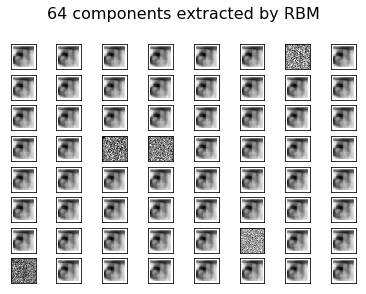

In [15]:
test = X[:20]

print(model.n_components)

for i, comp in enumerate(model.components_):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((32, 32)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    
plt.suptitle('64 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
    
plt.show()